# Прогнозирование оттока клиентов телеком компании

In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y 

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 106MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 90.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 22.3MB/s]


In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Посмотрим на рандомные 5 строк датасета.

In [ ]:
data.sample(n = 5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4126,15,89.00,1288.3,Female,1,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,No,Credit card (automatic),0
977,12,33.15,444.75,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,Yes,No,No,One year,No,Credit card (automatic),0
4154,63,81.20,4965.1,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,One year,Yes,Credit card (automatic),0
3507,22,95.10,2162.6,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,0
192,27,85.20,2151.6,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),0


Выведем быструю информацию о датасете

In [ ]:
data.shape

(5282, 20)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Видим, что у колонки TotalSpent тип object, в то время как в этом столбце находятся числовые значения. Переведем в числовой формат

In [ ]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')

Посмотрим информацию теперь

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Видим, что кол-во значений не nan в колонке TotalSpent уменьшилось, значит эти значения там действительно есть. Посмотрим на строчки, в которых TotalSpent - nan

In [ ]:
data.loc[(data['TotalSpent'].isna() == True)]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


TotalSpent - произведение значений ClientPeriod и MonthlySpending. Заменим в таком случае nan на произведение соответсвующих значений. Не будем заменять сразу на 0, поскольку допустим, что ClientPeriod не всегда равен 0 в строчках с nan у TotalSpent.

In [ ]:
data['TotalSpent'] = data['TotalSpent'].fillna(data['ClientPeriod'] * data['MonthlySpending'])

Посмотрим теперь на количество значений nan в датафрейме

In [ ]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Видим, что теперь нет значений nan, значит можно работать дальше.

# Анализ

In [ ]:
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
sns.set()

Построим графики для численных признаков. Численными у нас являются колонки ClientPeriod,	MonthlySpending и	TotalSpent 

<Figure size 8000x5000 with 0 Axes>

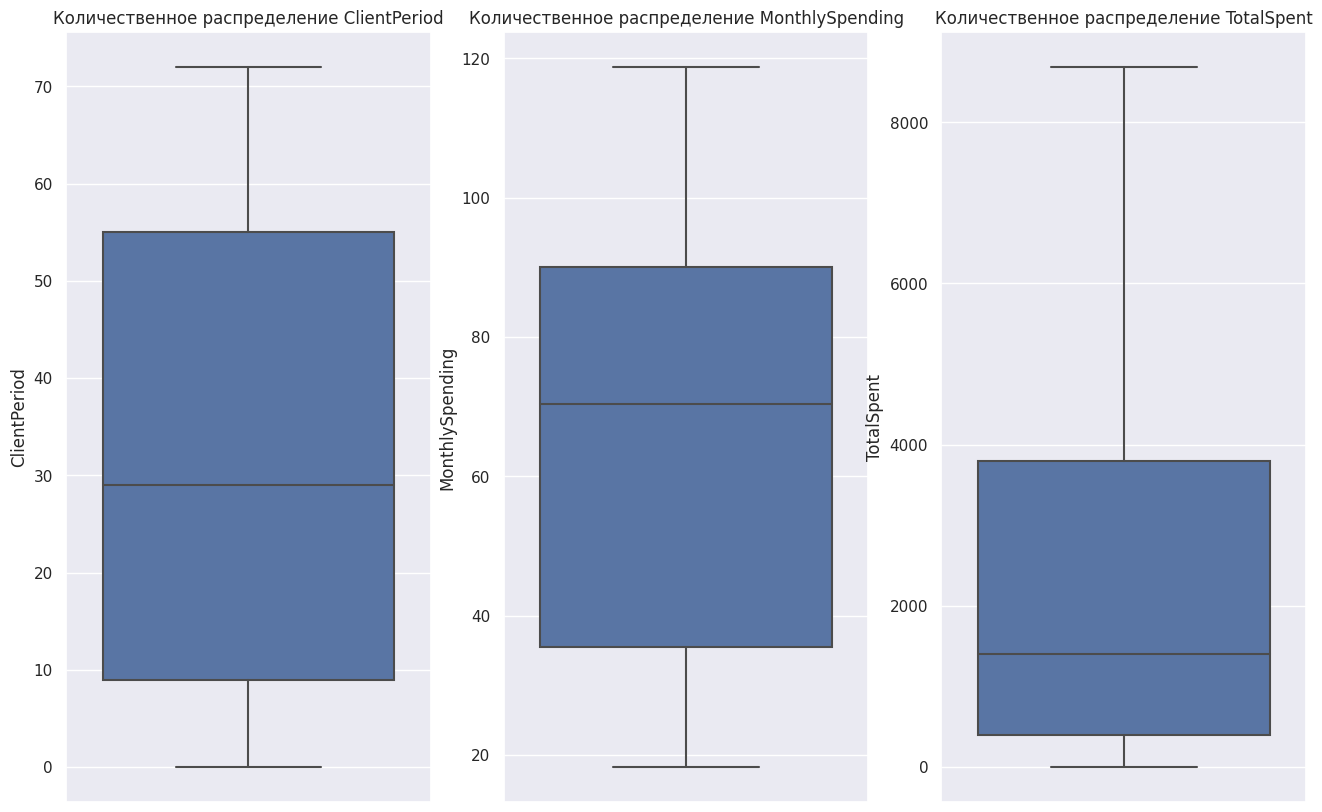

In [ ]:
plt.figure(figsize=(80, 50))
fig, axes = plt.subplots(1, 3)
rcParams['figure.figsize'] = 16, 10
for i, column in enumerate(num_cols):
  sns.boxplot(y = column, data=data, ax = axes[i]).set(title='Количественное распределение ' +  column)

Можем увидеть, что выбросов нет. Однако степень разброса значений у TotalSpent достаточно большая (видно по длине усов). Данные крайне не симметричны.

Выведем графики категориальных признаков, посчитав количество каждого значения в каждом столбце

In [ ]:
len(cat_cols)

16

<Figure size 2500x2500 with 0 Axes>

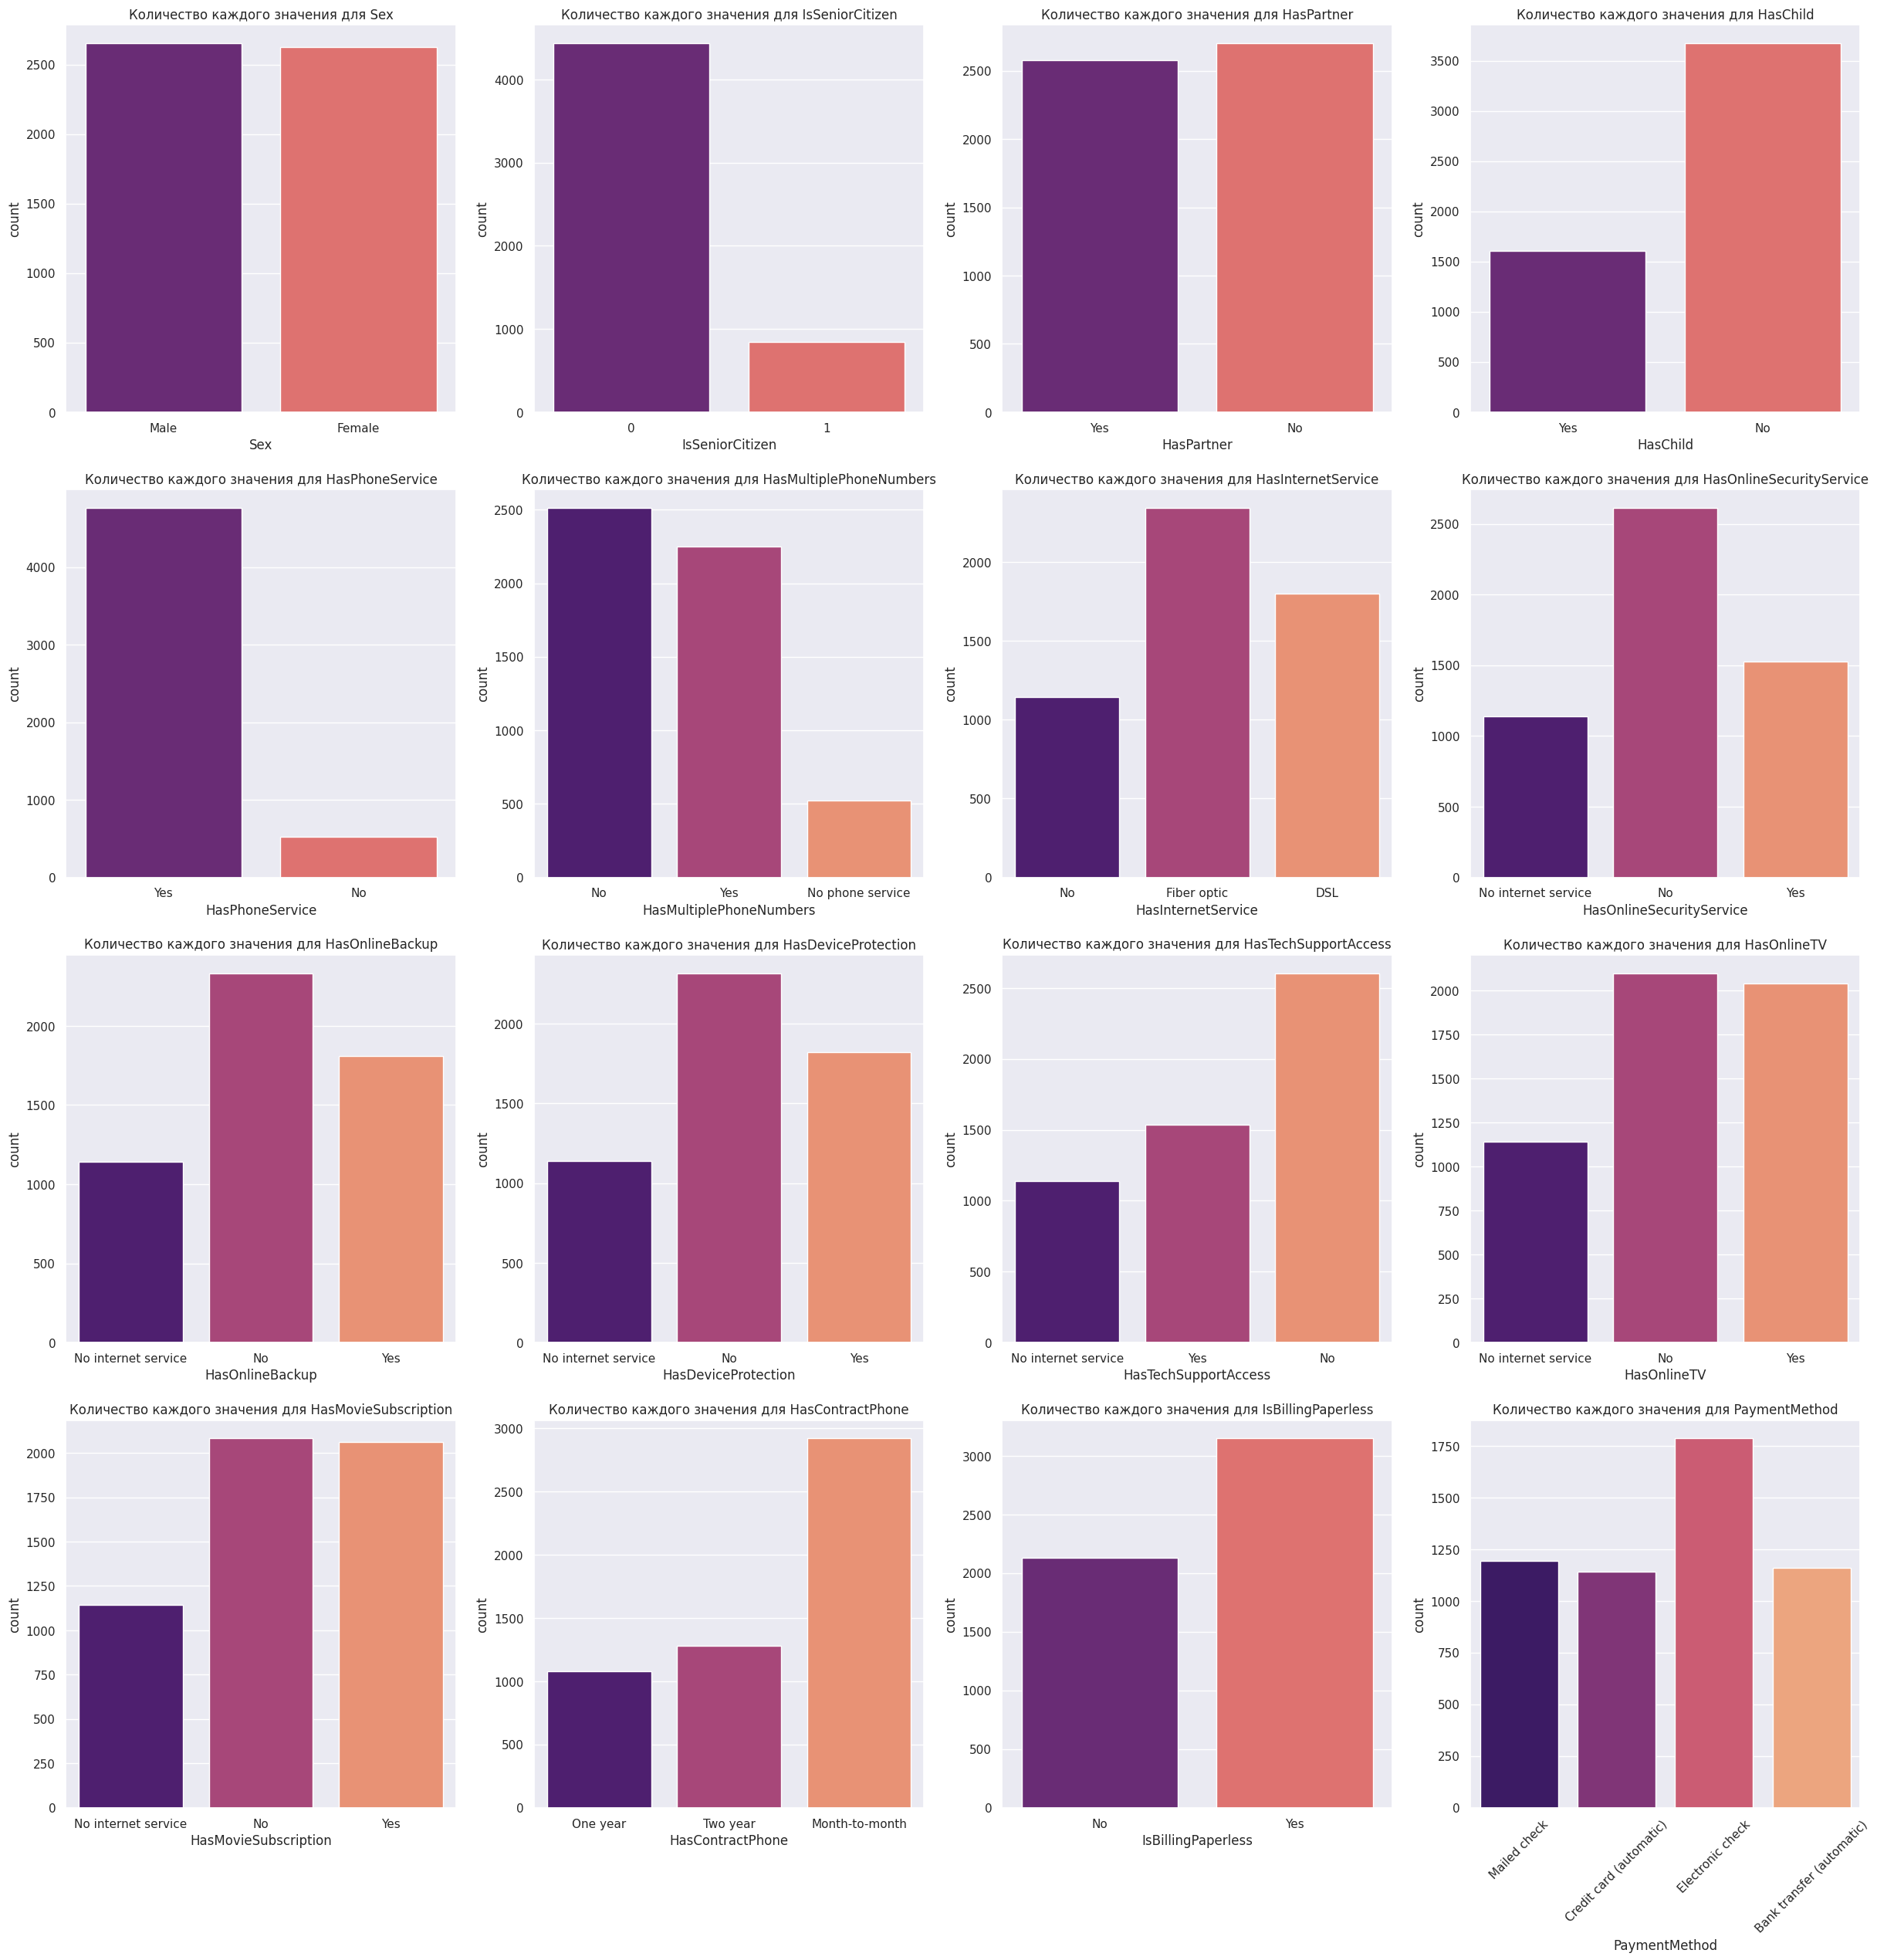

In [ ]:
plt.figure(figsize=(25, 25))
fig, axes = plt.subplots(4, 4)
rcParams['figure.figsize'] = 30, 20
j = 0
for i, column in enumerate(cat_cols):
  if j == 4:
    j = 0
  sns.countplot(x = column, data = data, palette = 'magma', ax = axes[i//4, j]).set(title = 'Количество каждого значения для ' + column)
  plt.xticks(rotation=45)
  j += 1

Выбросов нет, данные хорошие. Присутсвует некоторая несимметричность, но она оправдана.

Посмотрим на распределение целевой переменной.

Text(0.5, 1.0, 'Распределение целевой переменной')

<Figure size 500x500 with 0 Axes>

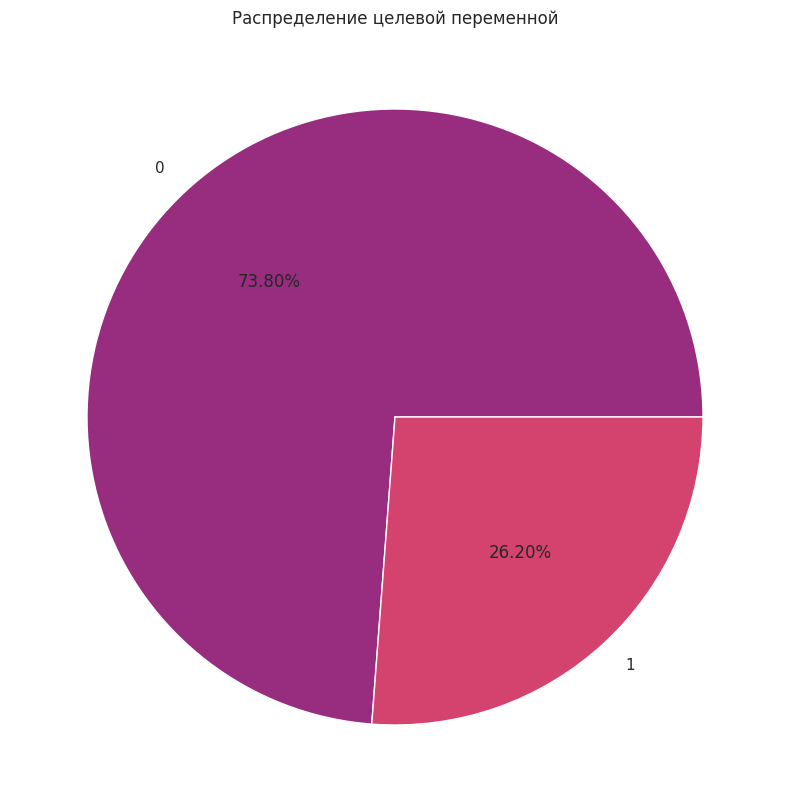

In [ ]:
plt.figure(figsize=(5, 5))
rcParams['figure.figsize'] = 16, 10
fig, ax = plt.subplots()
colors = sns.color_palette('magma')[ 2:5 ]
plt.pie(data['Churn'].value_counts())
x = data['Churn'].value_counts()
index = x.index
ax.pie(labels=index, x=x, autopct='%1.2f%%', shadow=False, colors = colors)
ax.set_title('Распределение целевой переменной')

Видим, что соотношение классов примерно 3:1, что является вполне сбалансированным значением. Значит, ничего предпринимать не будем.

# Применение линейных моделей 

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve

Создадим отдельный dataframe с численными признаками

In [ ]:
numeric_data = data[num_cols]
numeric_data

,ClientPeriod,MonthlySpending,TotalSpent
0,55,19.50,1026.35
1,72,25.85,1872.20
2,1,75.90,75.90
3,32,79.30,2570.00
4,60,115.25,6758.45
...,...,...,...
5277,3,30.40,82.15
5278,50,44.45,2188.45
5279,1,55.05,55.05
5280,29,76.00,2215.25


Закодируем категориальные признаки

In [ ]:
categorial_data = data[cat_cols]
dummy_features = pd.get_dummies(categorial_data)
dummy_features.head()

,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,1
1,0,0,1,0,1,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
2,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
3,1,1,0,0,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
4,0,1,0,0,1,0,1,0,1,0,...,1,0,0,1,1,0,0,1,0,0


In [ ]:
X = pd.concat([numeric_data, dummy_features], axis=1)
X_origin = data.iloc[:, :-1]
y = data[target_col]
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


Напишем функцию для нормировки числовых признаков. Поскольку в TotalSpent большой разброс значений, нормировать будем с пощью RobustScaler. Остальные - с помощью StandartScaler

In [ ]:
def get_norm_data(X_train, X_test):
  scaler = StandardScaler()
  transformer= RobustScaler()
  norm = [scaler, scaler, transformer]

  for col, norm in zip(X_train[num_cols], norm):
    X_train[col] = norm.fit_transform(X_train[col][:, np.newaxis])
    X_test[col] = norm.transform(X_test[col][:, np.newaxis])
  return X_train[num_cols], X_test[num_cols]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[num_cols], X_test[num_cols] = get_norm_data(X_train, X_test)
logreg_params = {'C': [100, 10, 1, 0.1, 0.01, 0.001]}

logreg_cv = GridSearchCV(estimator = LogisticRegression(random_state=777), 
                         param_grid = logreg_params,
                         cv = 5,
                         refit = True, 
                         scoring = 'roc_auc',
                         n_jobs = -1, 
                         verbose = 10)

logreg_cv.fit(X_train, y_train)

print('ROC-AUC:', logreg_cv.best_score_)
print('Best estimator:', logreg_cv.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
ROC-AUC: 0.8488204171423959
Best estimator: LogisticRegression(C=100, random_state=777)


In [ ]:
y_train_predicted_logr = logreg_cv.predict_proba(X_train)[:, 1]
y_test_predicted_logr = logreg_cv.predict_proba(X_test)[:, 1]

print('ROC-AUC train:', roc_auc_score(y_train, y_train_predicted_logr))
print('ROC-AUC test:', roc_auc_score(y_test, y_test_predicted_logr))

ROC-AUC train: 0.8538330665401983
ROC-AUC test: 0.8268717503532477


In [ ]:
def roc_auc_graf(y_train, y_test, y_train_predicted, y_test_predicted):
  train_auc = roc_auc_score(y_train, y_train_predicted)
  test_auc = roc_auc_score(y_test, y_test_predicted)
  plt.figure(figsize=(10,7))
  plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
  plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
  legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
  legend_box.set_facecolor("white")
  legend_box.set_edgecolor("black")
  plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
  plt.show()

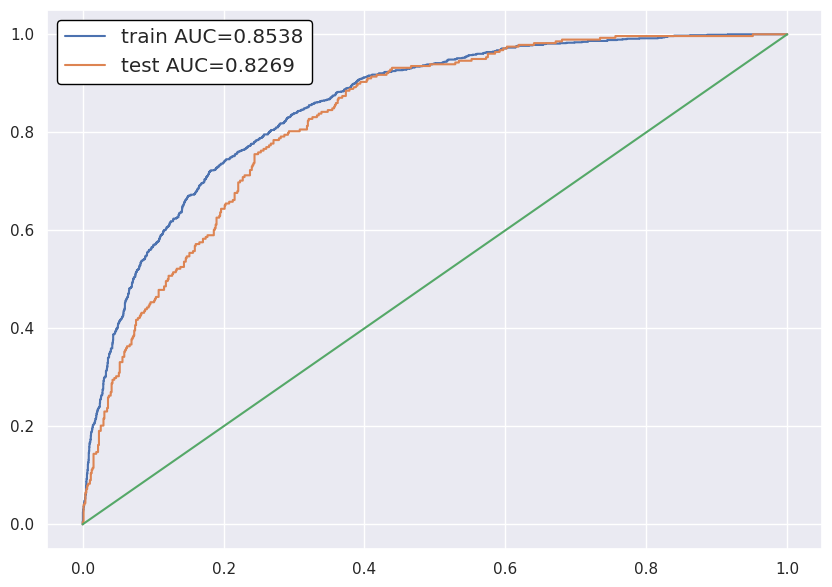

In [ ]:
roc_auc_graf(y_train, y_test, y_train_predicted_logr, y_test_predicted_logr)

В целом неплохие результаты. Можно посмотреть, что будет, если сбалансировать классы

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[num_cols], X_test[num_cols] = get_norm_data(X_train, X_test)
logreg_params = {'C': [100, 10, 1, 0.1, 0.01, 0.001]}

logreg_cv_bal = GridSearchCV(estimator = LogisticRegression(random_state=777, class_weight='balanced'), 
                         param_grid = logreg_params,
                         cv = 5,
                         refit = True, 
                         scoring = 'roc_auc',
                         n_jobs = -1, 
                         verbose = 10)

logreg_cv_bal.fit(X_train, y_train)

print('ROC-AUC:', logreg_cv_bal.best_score_)
print('ROC-AUC:', logreg_cv_bal.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
ROC-AUC: 0.8486767546932018
ROC-AUC: LogisticRegression(C=10, class_weight='balanced', random_state=777)


In [ ]:
y_train_predicted_logr_bal = logreg_cv_bal.predict_proba(X_train)[:, 1]
y_test_predicted_logr_bal = logreg_cv_bal.predict_proba(X_test)[:, 1]

print('ROC-AUC train:', roc_auc_score(y_train, y_train_predicted_logr_bal))
print('ROC-AUC test:', roc_auc_score(y_test, y_test_predicted_logr_bal))

ROC-AUC train: 0.853571588009557
ROC-AUC test: 0.826234519444778


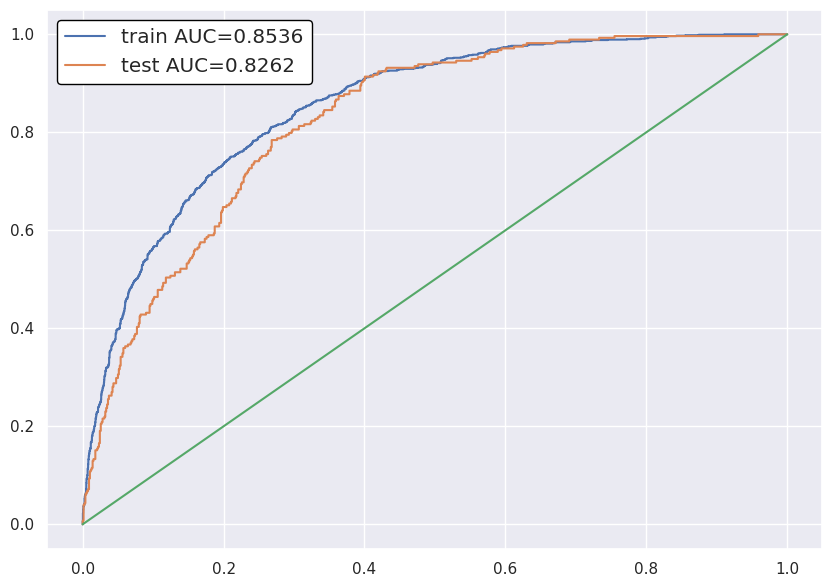

In [ ]:
roc_auc_graf(y_train, y_test, y_train_predicted_logr_bal, y_test_predicted_logr_bal)

Почему-то результат стал хуже. Пока что лучшей является предыдущая модель. Выпишем ее параметры

In [ ]:
print('Лучшее значение ROC-AUC: ', logreg_cv.best_score_, ' при C = ', 100)

Лучшее значение ROC-AUC:  0.8488204171423959  при C =  100


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[num_cols], X_test[num_cols] = get_norm_data(X_train, X_test)
Cs = np.logspace(-5, 20, 100)
logr = LogisticRegressionCV(Cs=Cs, random_state = 777, refit = True, scoring='roc_auc')
logr.fit(X_train, y_train)

best_C = logr.C_[0]
y_train_predicted_ = logr.predict_proba(X_train)[:, 1]
y_test_predicted_ = logr.predict_proba(X_test)[:, 1]

print('ROC-AUC train:', roc_auc_score(y_train, y_train_predicted_))
print('ROC-AUC test:', roc_auc_score(y_test, y_test_predicted_))

ROC-AUC train: 0.8538298777776296
ROC-AUC test: 0.8269779555046592


In [ ]:
best_C

65.79332246575683

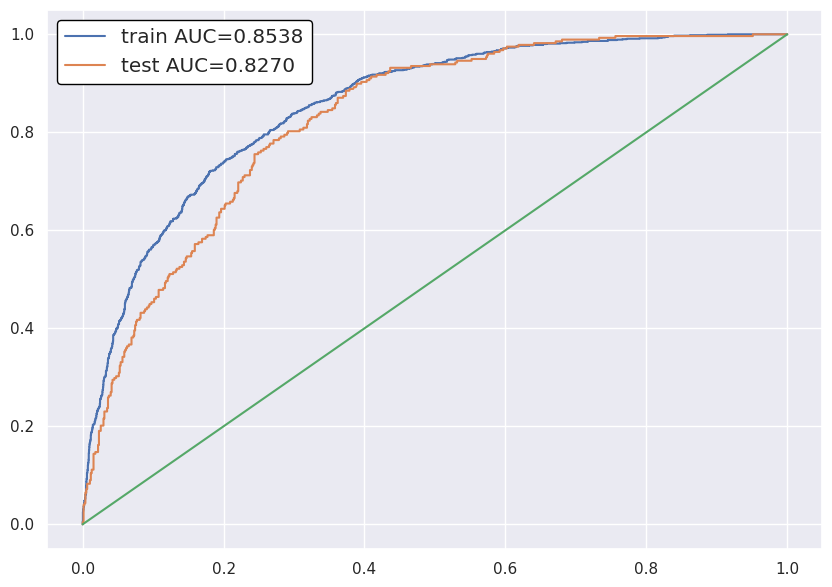

In [ ]:
roc_auc_graf(y_train, y_test, y_train_predicted_, y_test_predicted_)

In [ ]:
roc_auc_score(y_test, logr.predict_proba(X_test)[:, 1])

0.8267747804323936

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [ ]:
print('Лучшее значение ROC-AUC: ', roc_auc_score(y_test, logr.predict_proba(X_test)[:, 1]), ' при C = ', best_C)

Лучшее значение ROC-AUC:  0.8269779555046592  при C =  65.79332246575683


*   Лучшее значение ROC-AUC:  0.8269779555046592  
*   при C =  65.79332246575683

# Применение градиентного бустинга

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.1 MB/s eta 0:00:00


In [ ]:
import catboost
from sklearn.metrics import roc_auc_score, roc_curve

Попробуем catboost со стандартными параметрами

In [ ]:
X_train_origin, X_test_origin, y_train, y_test = train_test_split(X_origin, y, train_size=0.8, random_state=41)

boosting_model = catboost.CatBoostClassifier(n_estimators=400, cat_features=cat_cols, verbose=False, loss_function =  "Logloss")

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

print('ROC-AUC train:', roc_auc_score(y_train, y_train_predicted))
print('ROC-AUC test:', roc_auc_score(y_test, y_test_predicted))

ROC-AUC train: 0.8933548118288328
ROC-AUC test: 0.8627563762216586


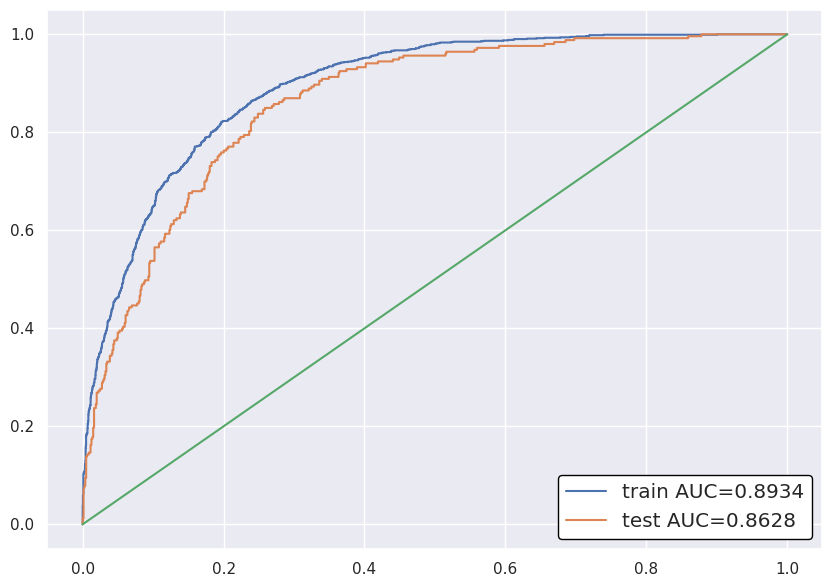

In [ ]:
roc_auc_graf(y_train, y_test, y_train_predicted, y_test_predicted)

In [ ]:
roc_auc_score(y_test, y_test_predicted)

0.8627563762216586

Теперь взвесим классы

In [ ]:
X_train_origin, X_test_origin, y_train, y_test = train_test_split(X_origin, y, train_size=0.8, random_state=41)

boosting_model_bal = catboost.CatBoostClassifier(n_estimators=400, cat_features=cat_cols, verbose=False, auto_class_weights='Balanced', loss_function =  "Logloss")

boosting_model_bal.fit(X_train_origin, y_train)

y_train_predicted_bal = boosting_model_bal.predict_proba(X_train_origin)[:, 1]
y_test_predicted_bal = boosting_model_bal.predict_proba(X_test_origin)[:, 1]

print('ROC-AUC train:', roc_auc_score(y_train, y_train_predicted_bal))
print('ROC-AUC test:', roc_auc_score(y_test, y_test_predicted_bal))

ROC-AUC train: 0.8946276327303009
ROC-AUC test: 0.8635798281320669


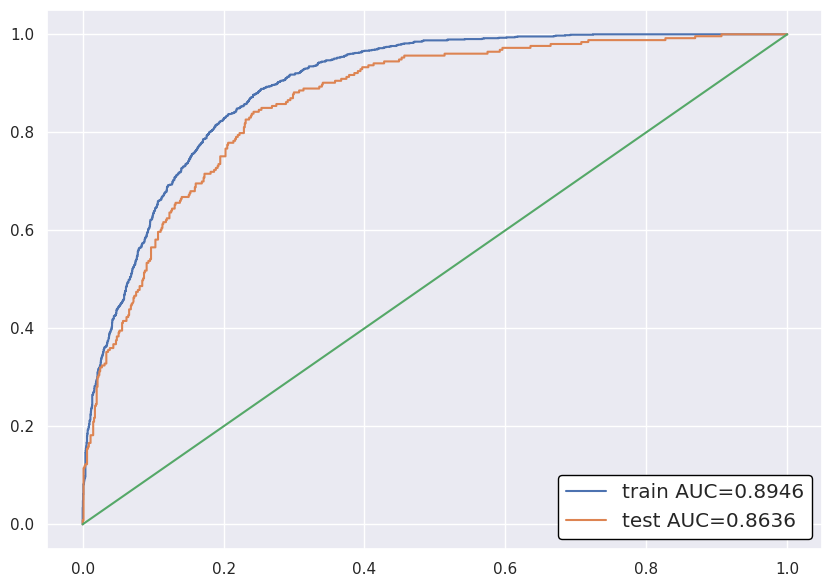

In [ ]:
roc_auc_graf(y_train, y_test, y_train_predicted_bal, y_test_predicted_bal)

In [ ]:
roc_auc_score(y_test, y_test_predicted_bal)

0.8635798281320669

В целом получили неплохой результат.

Попробуем менять l2_leaf_reg

In [ ]:
X_train_origin, X_test_origin, y_train, y_test = train_test_split(X_origin, y, train_size=0.8, random_state=41)

boosting_model_l2 = catboost.CatBoostClassifier(n_estimators=200, cat_features=cat_cols, verbose=False)

boosting_model_l2.grid_search({'l2_leaf_reg': np.linspace(0, 1, 20)}, 
                           X_train_origin, 
                           y_train, plot=False, refit=True, verbose=50)

boosting_model_l2.fit(X_train_origin, y_train)

y_train_predicted_l2 = boosting_model_l2.predict_proba(X_train_origin)[:, 1]
y_test_predicted_l2 = boosting_model_l2.predict_proba(X_test_origin)[:, 1]


bestTest = 0.4316703684
bestIteration = 114

0:	loss: 0.4316704	best: 0.4316704 (0)	total: 4.97s	remaining: 1m 34s

bestTest = 0.4316968095
bestIteration = 155


bestTest = 0.4311021162
bestIteration = 164


bestTest = 0.4319959691
bestIteration = 158


bestTest = 0.4296741095
bestIteration = 163


bestTest = 0.4295187099
bestIteration = 158


bestTest = 0.43239456
bestIteration = 170


bestTest = 0.4308753177
bestIteration = 125


bestTest = 0.4287173815
bestIteration = 185


bestTest = 0.4320824683
bestIteration = 192


bestTest = 0.4301397518
bestIteration = 182


bestTest = 0.4297846876
bestIteration = 156


bestTest = 0.4282626936
bestIteration = 164


bestTest = 0.430683487
bestIteration = 126


bestTest = 0.4311989027
bestIteration = 171


bestTest = 0.4298017272
bestIteration = 190


bestTest = 0.4287776285
bestIteration = 198


bestTest = 0.4295041667
bestIteration = 153


bestTest = 0.4306412107
bestIteration = 126


bestTest = 0.4294035191
bestIteration = 122

19:	loss: 0.4

In [ ]:
print('ROC-AUC train:', roc_auc_score(y_train, y_train_predicted))
print('ROC-AUC test:', roc_auc_score(y_test, y_test_predicted))

ROC-AUC train: 0.8657176806654105
ROC-AUC test: 0.8673505004621164


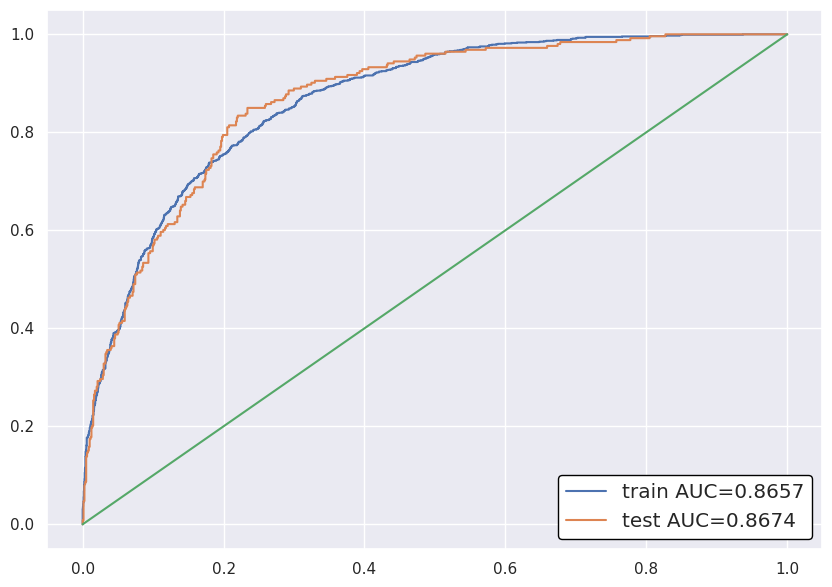

In [ ]:
roc_auc_graf(y_train, y_test, y_train_predicted_l2, y_test_predicted_l2)

Добавим еще параметры.

In [ ]:
X_train_origin, X_test_origin, y_train, y_test = train_test_split(X_origin, y, train_size=0.8, random_state=41)
boosting_model_par = catboost.CatBoostClassifier(silent=True,  auto_class_weights='Balanced', random_seed=42,
                                             cat_features=cat_cols, **{
        "iterations": 400,
        'learning_rate': 0.09,
        'bootstrap_type': 'Bayesian',
        'boosting_type': 'Ordered',
        'l2_leaf_reg': 4.5,
        "eval_metric": "AUC",
        "loss_function": "Logloss",
        "task_type":"CPU",
        "devices":'0:1',
        "early_stopping_rounds":20,
        "depth": 5
})

boosting_model_par.fit(X_train_origin, y_train, cat_features=cat_cols, eval_set=(X_test_origin, y_test), verbose = 100, use_best_model=True)

y_train_predicted_par = boosting_model_par.predict_proba(X_train_origin)[:, 1]
y_test_predicted_par = boosting_model_par.predict_proba(X_test_origin)[:, 1]

print('ROC-AUC train:', roc_auc_score(y_train, y_train_predicted_par))
print('ROC-AUC test:', roc_auc_score(y_test, y_test_predicted_par))

0:	test: 0.8182162	best: 0.8182162 (0)	total: 41.2ms	remaining: 16.4s
100:	test: 0.8680584	best: 0.8681174 (95)	total: 2.4s	remaining: 7.11s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8688794171
bestIteration = 122

Shrink model to first 123 iterations.
ROC-AUC train: 0.8524152162395258
ROC-AUC test: 0.8688794171435313


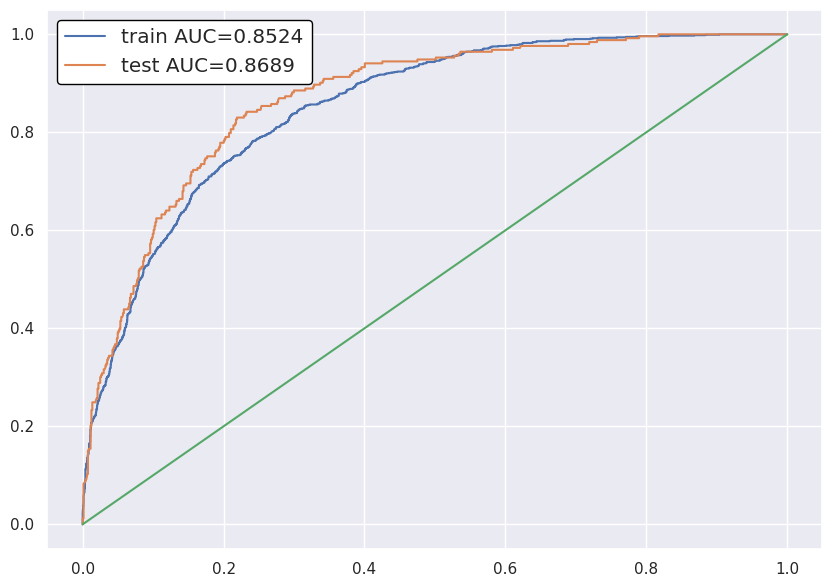

In [ ]:
roc_auc_graf(y_train, y_test, y_train_predicted_par, y_test_predicted_par)

Тестовая выборка является более репрезентативной. На основании последнего графика можем сделать выбор в пользу модели с большим количеством параметров

*   Лучшее качество: 0.8688
*   Лучшие параметры: 
        "iterations": 400,
        'learning_rate': 0.09,
        'bootstrap_type': 'Bayesian',
        'boosting_type': 'Ordered',
        'l2_leaf_reg': 4.5,
        "eval_metric": "AUC",
        "loss_function": "Logloss",
        "task_type":"CPU",
        "devices":'0:1',
        "early_stopping_rounds":20,
        "depth": 5




# Предсказания

In [ ]:
best_model = boosting_model_par

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)
submission

,Id,Churn
0,0,0.154750
1,1,0.787407
2,2,0.832622
3,3,0.057533
4,4,0.013824
...,...,...
1756,1756,0.259687
1757,1757,0.029511
1758,1758,0.890419
1759,1759,0.740468
